In [1]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd

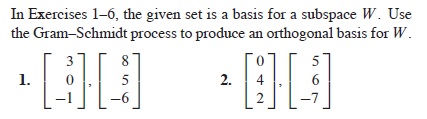

In [2]:
# Ex 6.4.1
v1 = Matrix([3, 0, -1])
x2 = Matrix([8, 5, -6])

# Check orthogonal
v1.dot(x2)

v2 = x2 - x2.project(v1)
v1.dot(v2)
display('W = {v1, v2}')

'W = {v1, v2}'

In [3]:
# Ex 6.4.12
A = Matrix([[1,3,5],[-1,-3,1],[0,2,3],[1,5,2],[1,5,8]])
v1 = A[:,0]
v2 = A[:,1] - A[:,1].project(v1)
v3 = A[:,2] - A[:,2].project(v1) - A[:,2].project(v2)
V = Matrix.hstack(v1, v2, v3)
V.T * V

⎡4  0  0 ⎤
⎢        ⎥
⎢0  8  0 ⎥
⎢        ⎥
⎣0  0  36⎦

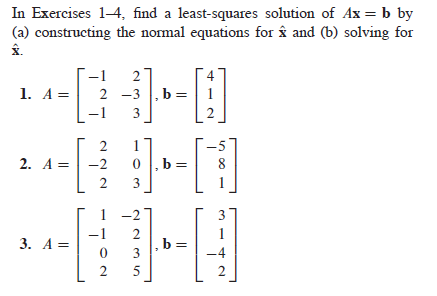

In [11]:
# Ex 6.5.1
A = Matrix([[-1,2],[2,-3],[-1,3]])
b = Matrix([[4],[1],[2]])

AtA = A.T * A
Atb = A.T * b

Matrix.hstack(AtA, Atb).rref()[0][:,-1]

In [15]:
# Ex 6.5.7
A = Matrix([[1,-2],[-1,2],[0,3],[2,5]])
b = Matrix([[3],[1],[-4],[2]])

AtA = A.T * A
Atb = A.T * b

xhat = Matrix.hstack(AtA, Atb).rref()[0][:,-1]
bhat = A*xhat
display((b - bhat).norm())

## In one go:
display((b - A*Matrix.hstack(AtA, Atb).rref()[0][:,-1]).norm())

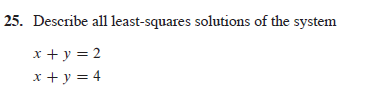

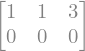

In [18]:
A = Matrix([[1, 1], [1, 1]])
b = Matrix([2, 4])

AtA = A.T * A
Atb = A.T * b

Matrix.hstack(AtA, Atb).rref()[0]

In [19]:
# 6.6.3
x = Matrix([-1, 0, 1, 2])
y = Matrix([0, 1, 2, 4])

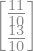

In [25]:
X = Matrix([ones(len(x), 1)]).row_join(Matrix(x))
XtX = X.T * X
Xty = X.T * y
B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]
B

In [26]:
display(Latex("$$y(t) = {}+{}t$$".format(round(B[0],2), round(B[1], 1))))

<IPython.core.display.Latex object>

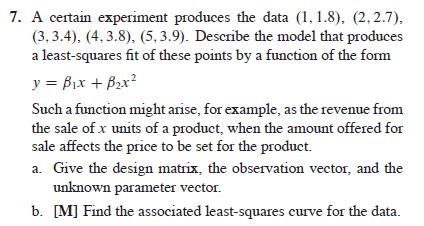

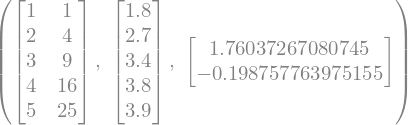

In [30]:
x = Matrix([1, 2, 3, 4, 5])
y = Matrix([1.8, 2.7, 3.4, 3.8, 3.9])

x2 = x.applyfunc(lambda a: a**2)
X = x.row_join(x2)
XtX = X.T * X
Xty = X.T * y
B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]
X, y, B

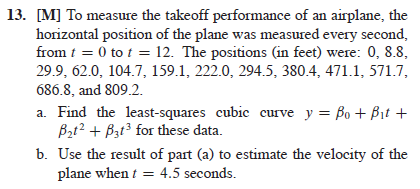

In [48]:
# a)
t = Matrix([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y = Matrix([0, 8.8, 29.9, 62.0, 104.7, 159.1, 222.0, 294.5, 380.4, 471.1, 571.7, 686.8, 809.2])
t2 = t.applyfunc(lambda a: a**2)
t3 = t.applyfunc(lambda a: a**3)
X = Matrix([ones(len(t), 1)]).row_join(t).row_join(t2).row_join(t3)
XtX = X.T * X
Xty = X.T * y

B = Matrix.hstack(XtX, Xty).rref()[0][:,-1]

display(Latex("$$y = {}+{}t+{}t^2 + {}t^3$$".format(round(B[0],4), round(B[1], 4),
                                                   round(B[2], 4), round(B[3], 4))))

<IPython.core.display.Latex object>

In [54]:
# b)
f = B[0] + B[1]*x + B[2]*x**2 + B[3]*x**3
x = symbols('x')

display(Math('v_{4.5} = ' + repr(round(f.diff().subs(x, 4.5), 2))))

<IPython.core.display.Math object>

In [55]:
# Example from class depart from AtA

A = Matrix([[7,1], [0, 0], [5, 5]])

# Step 1 + 2: Find eig. vals and eig. vect
AtA = A.T * A
AtA.eigenvects()
s1 = sqrt(AtA.eigenvects()[1][0])
s2 = sqrt(AtA.eigenvects()[0][0])
v1 = AtA.eigenvects()[1][2][0].normalized()
v2 = AtA.eigenvects()[0][2][0].normalized()

# Step 3: Derive u's
u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2

# We are missing one vector which we can derive
u3 = Matrix([u1.T, u2.T]).nullspace()[0]

# Step 4: Setup everything
V = Matrix.hstack(v1,v2)
Vt = V.T
U = Matrix.hstack(u1,u2,u3)
S = Matrix.vstack(diag(s1,s2), zeros(1,2))

# Step 5: Test
display(Latex("$$A = {}{}{}$$".format(latex(U), latex(S), latex(Vt))))
A == U*S*Vt

<IPython.core.display.Latex object>

True

In [68]:
# Departing from AAt

A = Matrix([[7,1], [0, 0], [5, 5]])

# Step 1 + 2: Find eig. vals and eig. vect
AAt = A*A.T
AAt.eigenvects()
s1 = sqrt(AAt.eigenvects()[2][0])
s2 = sqrt(AAt.eigenvects()[1][0])
s3 = sqrt(AAt.eigenvects()[0][0])
u1 = AAt.eigenvects()[2][2][0].normalized()
u2 = AAt.eigenvects()[1][2][0].normalized()
u3 = AAt.eigenvects()[0][2][0].normalized()

# Step 3: Derive v's
v1t = (s1**-1)*u1.T*A
v2t = (s2**-1)*u2.T*A

# Step 4: Setup everything
Vt = Matrix.vstack(v1t,v2t)
U = Matrix.hstack(u1,u2,u3)
S = Matrix.vstack(diag(s1,s2), zeros(1,2))

# Step 5: Test
display(Latex("$$A = {}{}{}$$".format(latex(U), latex(S), latex(Vt))))
A == U*S*Vt

<IPython.core.display.Latex object>

True